In [ ]:
import numpy as np
from scipy.optimize import linprog
import matplotlib.pyplot as plt

## Задание 1.1

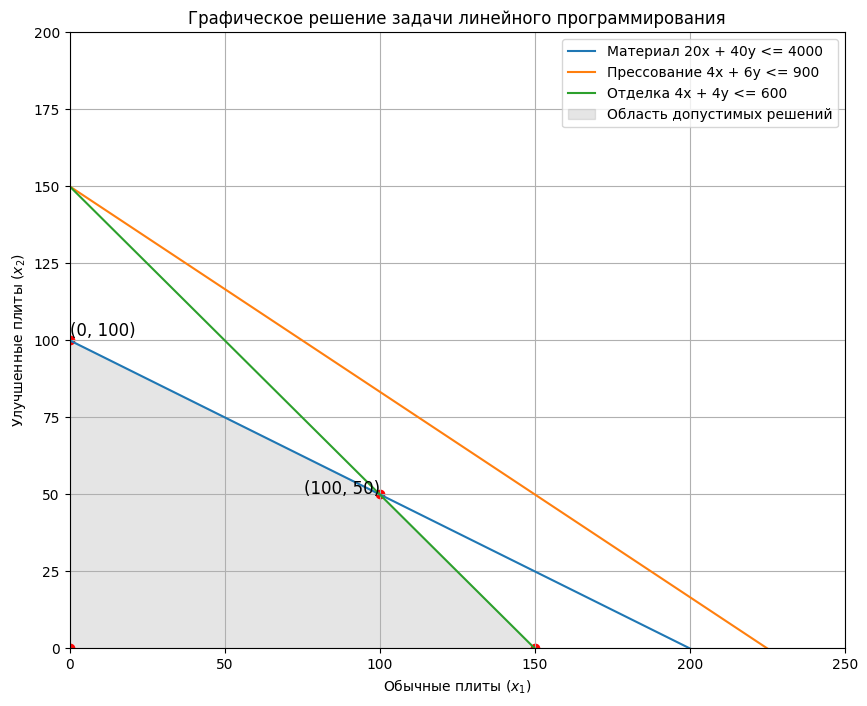

In [ ]:

# Диапазон значений x1
x1 = np.linspace(0, 250, 500)

# Ограничения
x2_material = (4000 - 20 * x1) / 40  # 20x1 + 40x2 <= 4000
x2_press = (900 - 4 * x1) / 6         # 4x1 + 6x2 <= 900
x2_finish = (600 - 4 * x1) / 4        # 4x1 + 4x2 <= 600

# Построение графиков
plt.figure(figsize=(10, 8))
plt.plot(x1, x2_material, label="Материал 20x + 40y <= 4000")
plt.plot(x1, x2_press, label="Прессование 4x + 6y <= 900")
plt.plot(x1, x2_finish, label="Отделка 4x + 4y <= 600")

# Заполнение ОДР
plt.fill_between(x1, np.minimum.reduce([x2_material, x2_press, x2_finish]), 0, alpha=0.2, color='gray', label="Область допустимых решений")

# Угловые точки
plt.scatter([0, 150, 100, 0], [0, 0, 50, 100], color='red')
plt.text(100, 50, '(100, 50)', fontsize=12, ha='right')
plt.text(0, 100, '(0, 100)', fontsize=12, va='bottom')

# Настройка графика
plt.xlim(0, 250)
plt.ylim(0, 200)
plt.xlabel("Обычные плиты ($x_1$)")
plt.ylabel("Улучшенные плиты ($x_2$)")
plt.legend()
plt.grid()
plt.title("Графическое решение задачи линейного программирования")
plt.show()

## Задание 1.2 без ограничений

In [ ]:
c = np.array([-30, -50])

A_ub = np.array([[20, 40],
                 [4, 6],
                 [4, 4]])
b_ub = np.array([4000, 900, 600])

x0_bounds = (0, None)
x1_bounds = (0, None)
bounds = [x0_bounds, x1_bounds]

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

if result.success:
    print("Оптимальное решение найдено:")
    print(f"Обычные плиты (x1): {result.x[0]:.0f} шт.")
    print(f"Улучшенные плиты (x2): {result.x[1]:.0f} шт.")

    max_profit = -result.fun
    print(f"Максимальная прибыль: {max_profit:.0f} у.е.")
else:
    print("Оптимальное решение не найдено!")
    print("Причина:", result.message)

Оптимальное решение найдено:
Обычные плиты (x1): 100 шт.
Улучшенные плиты (x2): 50 шт.
Максимальная прибыль: 5500 у.е.


## Задание 1.2 с ограничениями

In [ ]:
c = np.array([-30, -50])

A_ub = np.array([[20, 40],
                 [4, 6],
                 [4, 4],
                 [1, 1]])
b_ub = np.array([4000, 900, 600, 100])

x0_bounds = (0, None)
x1_bounds = (0, None)
bounds = [x0_bounds, x1_bounds]

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

if result.success:
    print("Оптимальное решение найдено:")
    print(f"Обычные плиты (x1): {result.x[0]:.0f} шт.")
    print(f"Улучшенные плиты (x2): {result.x[1]:.0f} шт.")

    max_profit = -result.fun
    print(f"Максимальная прибыль: {max_profit:.0f} у.е.")
else:
    print("Оптимальное решение не найдено!")
    print("Причина:", result.message)

Оптимальное решение найдено:
Обычные плиты (x1): -0 шт.
Улучшенные плиты (x2): 100 шт.
Максимальная прибыль: 5000 у.е.


## Задание 2

In [ ]:
# ответ 12 400
UnitsString = "Титаны Наги Джинны Маги Големы Горгульи Гремлины"
UnitsList = UnitsString.split()
print(UnitsList)
# функция, которую нужно минимизировать
c = np.array([-300, -120, -60, -40, -35, -20, -4]) # сила воинов,

# условия меньше или равно
A_ub = np.array([[5000, 1500, 750, 500, 400, 200, 70], # золото
                 [3, 2, 1, 1, 0, 0, 0], # драг камни
                 [1, 0, 1, 1, 1, 0, 0], # ртуть
                 [-300, 0, 0, -40, 0, 0, -4], # сила существ дальнего боя
                 [0, 0, -60, 0, 0, -20, 0]]) # сила летающих существ
# ограничения по стоимости и силе
b_ub = np.array([200000, 115, 80, -4000, -2000])

x0_bounds = (0, 10)
x1_bounds = (0, 20)
x2_bounds = (0, 30)
x3_bounds = (0, 55)
x4_bounds = (0, 60)
x5_bounds = (0, 110)
x6_bounds = (0, 500)
bounds = [x0_bounds, x1_bounds, x2_bounds, x3_bounds, x4_bounds, x5_bounds ,x6_bounds]

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

print(result)
for i in range(len(result.x)):
    print(UnitsList[i], result.x[i])

['Титаны', 'Наги', 'Джинны', 'Маги', 'Големы', 'Горгульи', 'Гремлины']
        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: -12875.0
              x: [ 1.000e+01  2.000e+01  3.000e+01  1.500e+01  2.500e+01
                   1.100e+02  5.000e+02]
            nit: 2
          lower:  residual: [ 1.000e+01  2.000e+01  3.000e+01  1.500e+01
                              2.500e+01  1.100e+02  5.000e+02]
                 marginals: [ 0.000e+00  0.000e+00  0.000e+00  0.000e+00
                              0.000e+00  0.000e+00  0.000e+00]
          upper:  residual: [ 0.000e+00  0.000e+00  0.000e+00  4.000e+01
                              3.500e+01  0.000e+00  0.000e+00]
                 marginals: [-2.500e+02 -1.100e+02 -2.000e+01  0.000e+00
                              0.000e+00 -2.000e+01 -4.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 2.300e+04  0

## Задание 3 Моё решение. Тут что-то не так, надо перепроверить.

In [ ]:
# размеры холодильников 320, 280 и 350 т
# нужно доставить в каждый магазин 140, 110, 230, 150 и 220 т.

# стоимость доставки из первого холодильника в первый магазин, во второй магазин и т.д.
#             X11 12  13  14  15   21  22  23  24  25   31 32  33  34 35 ->min
c = np.array([20, 23, 20, 15, 24,  29, 15, 16, 19, 29,  6, 11, 10, 9, 8])

A_ub = np.array([[1, 1, 1, 1, 1,  0, 0, 0, 0, 0,  0, 0, 0, 0, 0], # стоимость доставки из первого склада в магазины
                 [0, 0, 0, 0, 0,  1, 1, 1, 1, 1,  0, 0, 0, 0, 0],
                 [0, 0, 0, 0, 0,  0, 0, 0, 0, 0,  1, 1, 1, 1, 1],

                 [1, 0, 0, 0, 0,  1, 0, 0, 0, 0,  1, 0, 0, 0, 0], # объём, который может принять первый магазин
                 [0, 1, 0, 0, 0,  0, 1, 0, 0, 0,  0, 1, 0, 0, 0],
                 [0, 0, 1, 0, 0,  0, 0, 1, 0, 0,  0, 0, 1, 0, 0],
                 [0, 0, 0, 1, 0,  0, 0, 0, 1, 0,  0, 0, 0, 1, 0],
                 [0, 0, 0, 0, 1,  0, 0, 0, 0, 1,  0, 0, 0, 0, 1]])


b_ub = np.array([320, 280, 350,  140, 110, 230, 150, 220])
bounds = [(0, None) for i in range(15)]
#b_ub = np.array([140, 110, 230, 150, 220])

result = linprog(c, A_eq=A_eq, b_eq=b_eq, bounds = bounds)

print(result.fun)
print(result.x)

7460.0
[  0.   0.   0.   0.   0.   0.   0.   0.   0.   0. 140. 110. 230. 150.
 220.]


## Задание 3 Сделал Виталий c помощью дипсика. Правильно.

In [ ]:
import numpy as np
from scipy.optimize import linprog

# Стоимости перевозки (flattened: A1->B1..B5, A2->B1..B5, A3->B1..B5)
costs = [20, 23, 20, 15, 24,
         29, 15, 16, 19, 29,
         6, 11, 10, 9, 8]

# Ограничения по поставщикам (A1, A2, A3)
supply = [320, 280, 350]

# Ограничения по потребителям (B1, B2, B3, B4, B5)
demand = [140, 110, 230, 150, 220]

# Создаем матрицу ограничений (<= для supply и = для demand, через A_eq и A_ub)
A_eq = []
b_eq = demand

# Для каждого магазина — сумма отгрузок из всех холодильников = спросу
for j in range(5):  # магазины
    constraint = [0] * 15
    for i in range(3):  # холодильники
        constraint[i * 5 + j] = 1
    A_eq.append(constraint)

A_ub = []
b_ub = supply

# Для каждого холодильника — сумма поставок <= его запасу
for i in range(3):
    constraint = [0] * 15
    for j in range(5):
        constraint[i * 5 + j] = 1
    A_ub.append(constraint)

# Границы переменных (все >= 0)
bounds = [(0, None)] * 15

# Решаем задачу
res = linprog(c=costs, A_eq=A_eq, b_eq=b_eq, A_ub=A_ub, b_ub=b_ub, bounds=bounds, method='highs')

# Результат
if res.success:
    print("Минимальная стоимость перевозки:", res.fun)
    x = np.array(res.x).reshape((3, 5))
    print("План перевозок (тонн):")
    for i, row in enumerate(x, start=1):
        print(f"A{i}: {row}")
else:
    print("Решение не найдено.")

print(A_ub)
print(b_ub)

Минимальная стоимость перевозки: 10560.0
План перевозок (тонн):
A1: [ 10.   0.  60. 150.   0.]
A2: [  0. 110. 170.   0.   0.]
A3: [130.   0.   0.   0. 220.]
[[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]]
[320, 280, 350]


In [ ]:
for i in A_ub:
    print(i)

[1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


# Решение примера из лекции про лимоны.

In [ ]:
c = np.array([17, 58])

A_ub = np.array([[-40, -1.5],
                [-0.2, -25.2]])
b_ub = np.array([-75, -14])

x0_bounds = (0, None)
x1_bounds = (0, None)
bounds = [x0_bounds, x1_bounds]

result = linprog(c, A_ub=A_ub, b_ub=b_ub, bounds=bounds)

print(result)

        message: Optimization terminated successfully. (HiGHS Status 7: Optimal)
        success: True
         status: 0
            fun: 62.89868016274685
              x: [ 1.855e+00  5.408e-01]
            nit: 2
          lower:  residual: [ 1.855e+00  5.408e-01]
                 marginals: [ 0.000e+00  0.000e+00]
          upper:  residual: [       inf        inf]
                 marginals: [ 0.000e+00  0.000e+00]
          eqlin:  residual: []
                 marginals: []
        ineqlin:  residual: [ 0.000e+00  0.000e+00]
                 marginals: [-4.136e-01 -2.277e+00]
 mip_node_count: 0
 mip_dual_bound: 0.0
        mip_gap: 0.0
